In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

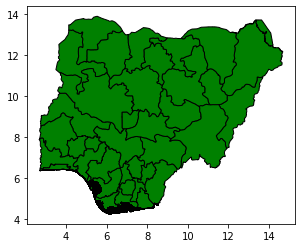

In [90]:
ng_st = gpd.read_file(r'C:\Users\USER\Desktop\Data\02\nigeria_states\nigeria_states.shp')
ng_st.plot(color='green', edgecolor='black')
ng_st = ng_st.rename(columns={'HASC_1':'code'})


In [91]:
ng_csv = pd.read_csv(r'C:\Users\USER\Desktop\Data\02\spreadsheets\states_pop_06_16.csv')
ng_csv.head()

,Rank (2006),State,Population (2006),Population (2016),code
0,28,Abia State,2845380,3727347,NG.AB
1,26,Adamawa State,3178950,4248436,NG.AD
2,15,Akwa Ibom State,3178950,5482177,NG.AK
3,10,Anambra State,4177828,5527809,NG.AN
4,7,Bauchi State,4653066,6537314,NG.BA


In [92]:
ng_st = ng_st.merge(ng_csv, how='left', left_on='code', right_on='code', copy=False )
ng_st.head()

,NAME_1,code,VALIDFR_1,F60_63,F63_67,colour,geometry,Rank (2006),State,Population (2006),Population (2016)
0,Abia,NG.AB,1991,Eastern,Eastern,NaN,"POLYGON ((7.50801 6.00969, 7.51943 6.00188, 7....",28,Abia State,2845380.0,3727347.0
1,Adamawa,NG.AD,19911212,Northern,Northern,NaN,"POLYGON ((13.69030 10.90968, 13.69071 10.89992...",26,Adamawa State,3178950.0,4248436.0
2,Akwa Ibom,NG.AK,19911212,Eastern,Eastern,NaN,"MULTIPOLYGON (((7.61070 4.47292, 7.61070 4.472...",15,Akwa Ibom State,3178950.0,5482177.0
3,Anambra,NG.AN,1991,Eastern,Eastern,NaN,"POLYGON ((6.91518 6.71104, 6.92614 6.70848, 6....",10,Anambra State,4177828.0,5527809.0
4,Bauchi,NG.BA,1996,Northern,Northern,NaN,"POLYGON ((10.73445 12.40430, 10.75293 12.35778...",7,Bauchi State,4653066.0,6537314.0


In [93]:
reproj = ng_st.to_crs('epsg:26331')
reproj.crs


<Projected CRS: EPSG:26331>
Name: Minna / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Nigeria - offshore deep water - west of 6°E
- bounds: (2.66, 1.92, 6.0, 6.14)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: Minna
- Ellipsoid: Clarke 1880 (RGS)
- Prime Meridian: Greenwich

In [97]:
reproj['pop_dens']= reproj['Population (2006)']/reproj.area*10**6

reproj.head()

,NAME_1,code,VALIDFR_1,F60_63,F63_67,colour,geometry,Rank (2006),State,Population (2006),Population (2016),pop_dens
0,Abia,NG.AB,1991,Eastern,Eastern,NaN,"POLYGON ((999479.620 666219.898, 1000754.356 6...",28,Abia State,2845380.0,3727347.0,599.082840
1,Adamawa,NG.AD,19911212,Northern,Northern,NaN,"POLYGON ((1674680.528 1226794.792, 1674765.581...",26,Adamawa State,3178950.0,4248436.0,90.493917
2,Akwa Ibom,NG.AK,19911212,Eastern,Eastern,NaN,"MULTIPOLYGON (((1012132.517 495894.999, 101213...",15,Akwa Ibom State,3178950.0,5482177.0,468.953177
3,Anambra,NG.AN,1991,Eastern,Eastern,NaN,"POLYGON ((933108.706 743420.998, 934325.255 74...",10,Anambra State,4177828.0,5527809.0,906.620052
4,Bauchi,NG.BA,1996,Northern,Northern,NaN,"POLYGON ((1343123.414 1383422.731, 1345300.528...",7,Bauchi State,4653066.0,6537314.0,93.544680


<AxesSubplot:>

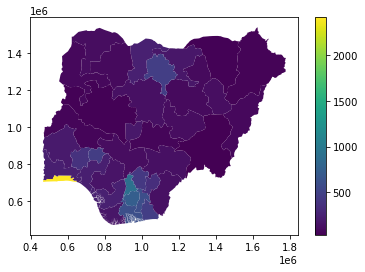

In [103]:
reproj.plot(column='pop_dens', cmap='viridis', legend=True)